## DelayWiz Final Code

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection


In [2]:
df_weather=pd.read_csv('JFK weather 05_2021-04_2023.csv')#,header=None)
#drop STATION, NAME, PGTM, WT01-09
df_weather.head(2)

,STATION,NAME,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,...,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09
0,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",2021-05-01,18.12,0.0,0.0,0.0,53,65,42,...,36.9,46.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",2021-05-02,11.41,0.0,0.0,0.0,61,79,52,...,21.9,27.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_weather=df_weather.drop(['STATION', 'NAME'], axis=1)

In [4]:
df_weather['WT01']= np.where(np.isnan(df_weather['WT01']), 0, df_weather['WT01'])
df_weather['WT02']= np.where(np.isnan(df_weather['WT02']), 0, df_weather['WT02'])
df_weather['WT03']= np.where(np.isnan(df_weather['WT03']), 0, df_weather['WT03'])
df_weather['WT04']= np.where(np.isnan(df_weather['WT04']), 0, df_weather['WT04'])
df_weather['WT05']= np.where(np.isnan(df_weather['WT05']), 0, df_weather['WT05'])
df_weather['WT06']= np.where(np.isnan(df_weather['WT06']), 0, df_weather['WT06'])
df_weather['WT08']= np.where(np.isnan(df_weather['WT08']), 0, df_weather['WT08'])
df_weather['WT09']= np.where(np.isnan(df_weather['WT09']), 0, df_weather['WT09'])

In [5]:
df_weather['DATE'] = pd.to_datetime(df_weather['DATE'])

In [6]:
df_weather = df_weather.rename(columns={'DATE': 'FL_DATE'})
df_weather.head(2)

,FL_DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09
0,2021-05-01,18.12,0.0,0.0,0.0,53,65,42,310,320,36.9,46.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-05-02,11.41,0.0,0.0,0.0,61,79,52,260,260,21.9,27.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
weather_data = df_weather.to_csv('weather_data.csv', index = False)

In [8]:
df_jfk=pd.read_csv('JFK data.csv') #processed data set
df_jfk

,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,DEST_AIRPORT_ID,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DEL15,TAXI_OUT,ARR_DELAY,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2021-05-01,HA,N384HA,12173,HNL,1000,955.0,-5.0,0.0,20.0,1.0,4983,11,0.0,0.0,0.0,0.0,0.0
1,2021-05-01,DL,N869DN,13204,MCO,1552,1549.0,-3.0,0.0,13.0,-32.0,944,4,0.0,0.0,0.0,0.0,0.0
2,2021-05-01,DL,N377DA,13204,MCO,820,819.0,-1.0,0.0,20.0,-20.0,944,4,0.0,0.0,0.0,0.0,0.0
3,2021-05-01,DL,N140DU,13487,MSP,635,651.0,16.0,1.0,17.0,9.0,1029,5,0.0,0.0,0.0,0.0,0.0
4,2021-05-01,DL,N367NW,13303,MIA,1156,1153.0,-3.0,0.0,11.0,-34.0,1089,5,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248034,2023-04-30,B6,N993JE,14679,SAN,2045,2113.0,28.0,1.0,17.0,-29.0,2446,10,0.0,0.0,0.0,0.0,0.0
248035,2023-04-30,B6,N337JB,10721,BOS,2000,2153.0,113.0,1.0,22.0,105.0,187,1,39.0,0.0,0.0,0.0,66.0
248036,2023-04-30,B6,N989JT,12892,LAX,545,539.0,-6.0,0.0,13.0,-41.0,2475,10,0.0,0.0,0.0,0.0,0.0
248037,2023-04-30,B6,N179JB,14027,PBI,900,1035.0,95.0,1.0,33.0,124.0,1028,5,0.0,0.0,117.0,0.0,7.0


In [9]:
df_jfk['FL_DATE'] = pd.to_datetime(df_jfk['FL_DATE'])
df_jfk_weather=pd.merge( df_jfk, df_weather, on='FL_DATE')
final_jfk_weather_airplane_data = df_jfk_weather.to_csv('final_jfk_weather_airplane_data.csv', index = False)


## **Data** **Exploration**


In [10]:
df_flight = pd.read_csv('FINAL_DATA_jfk_weather_airplane_data.csv')
df_flight.describe()

,Unnamed: 0,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DEL15,TAXI_OUT,ARR_DELAY,DISTANCE,DISTANCE_GROUP,...,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09
count,241000.000000,241000.000000,241000.000000,241000.000000,241000.000000,241000.000000,241000.000000,241000.00000,241000.000000,241000.000000,...,241000.000000,241000.000000,241000.000000,241000.000000,241000.000000,241000.000000,241000.000000,241000.000000,241000.000000,241000.000000
mean,124052.988548,12873.629979,1380.860336,1385.349680,15.864282,0.239506,24.903946,7.02205,1182.424270,5.184805,...,22.276229,27.853107,0.347017,0.059701,0.081187,0.016249,0.001328,0.002548,0.044427,0.000087
std,71907.407788,1585.944099,484.923450,507.134481,54.763300,0.426783,12.679518,58.18836,855.324586,3.256141,...,6.531304,8.556869,0.476022,0.236933,0.273122,0.126432,0.036415,0.050411,0.206043,0.009334
min,0.000000,10140.000000,500.000000,1.000000,-65.000000,0.000000,3.000000,-95.00000,94.000000,1.000000,...,8.900000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60942.750000,11193.000000,920.000000,923.000000,-5.000000,0.000000,17.000000,-20.00000,427.000000,2.000000,...,17.000000,21.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,124344.500000,13198.000000,1429.000000,1428.000000,-2.000000,0.000000,22.000000,-7.00000,1005.000000,5.000000,...,21.000000,25.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,186508.250000,14492.000000,1815.000000,1825.000000,13.000000,0.000000,29.000000,13.00000,1990.000000,8.000000,...,25.900000,33.100000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,248038.000000,15304.000000,2359.000000,2400.000000,1627.000000,1.000000,180.000000,1633.00000,4983.000000,11.000000,...,48.100000,57.900000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_flight.head()

,Unnamed: 0,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,DEST_AIRPORT_ID,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DEL15,TAXI_OUT,ARR_DELAY,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09
0,0,2021-05-01,HA,N384HA,12173,HNL,1000,955.0,-5.0,0.0,20.0,1.0,4983,11,0.0,0.0,0.0,0.0,0.0,18.12,0.0,0.0,0.0,53,65,42,310,320,36.9,46.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2021-05-01,DL,N869DN,13204,MCO,1552,1549.0,-3.0,0.0,13.0,-32.0,944,4,0.0,0.0,0.0,0.0,0.0,18.12,0.0,0.0,0.0,53,65,42,310,320,36.9,46.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2021-05-01,DL,N377DA,13204,MCO,820,819.0,-1.0,0.0,20.0,-20.0,944,4,0.0,0.0,0.0,0.0,0.0,18.12,0.0,0.0,0.0,53,65,42,310,320,36.9,46.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2021-05-01,DL,N140DU,13487,MSP,635,651.0,16.0,1.0,17.0,9.0,1029,5,0.0,0.0,0.0,0.0,0.0,18.12,0.0,0.0,0.0,53,65,42,310,320,36.9,46.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2021-05-01,DL,N367NW,13303,MIA,1156,1153.0,-3.0,0.0,11.0,-34.0,1089,5,0.0,0.0,0.0,0.0,0.0,18.12,0.0,0.0,0.0,53,65,42,310,320,36.9,46.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_flight.shape

(241000, 38)

In [ ]:
df_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241000 entries, 0 to 240999
Data columns (total 38 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           241000 non-null  int64  
 1   FL_DATE              241000 non-null  object 
 2   OP_UNIQUE_CARRIER    241000 non-null  object 
 3   TAIL_NUM             241000 non-null  object 
 4   DEST_AIRPORT_ID      241000 non-null  int64  
 5   DEST                 241000 non-null  object 
 6   CRS_DEP_TIME         241000 non-null  int64  
 7   DEP_TIME             241000 non-null  float64
 8   DEP_DELAY            241000 non-null  float64
 9   DEP_DEL15            241000 non-null  float64
 10  TAXI_OUT             241000 non-null  float64
 11  ARR_DELAY            241000 non-null  float64
 12  DISTANCE             241000 non-null  int64  
 13  DISTANCE_GROUP       241000 non-null  int64  
 14  CARRIER_DELAY        241000 non-null  float64
 15  WEATHER_DELAY    

In [ ]:
#Create a column Delayed which has a 0 for delay time<=0 and 1 for delay time>0
df_flight['Delayed']=np.where(df_flight['DEP_DELAY']<=0, 0,1)

In [ ]:
df_flight['Delayed'].value_counts(normalize=True)

0    0.605423
1    0.394577
Name: Delayed, dtype: float64

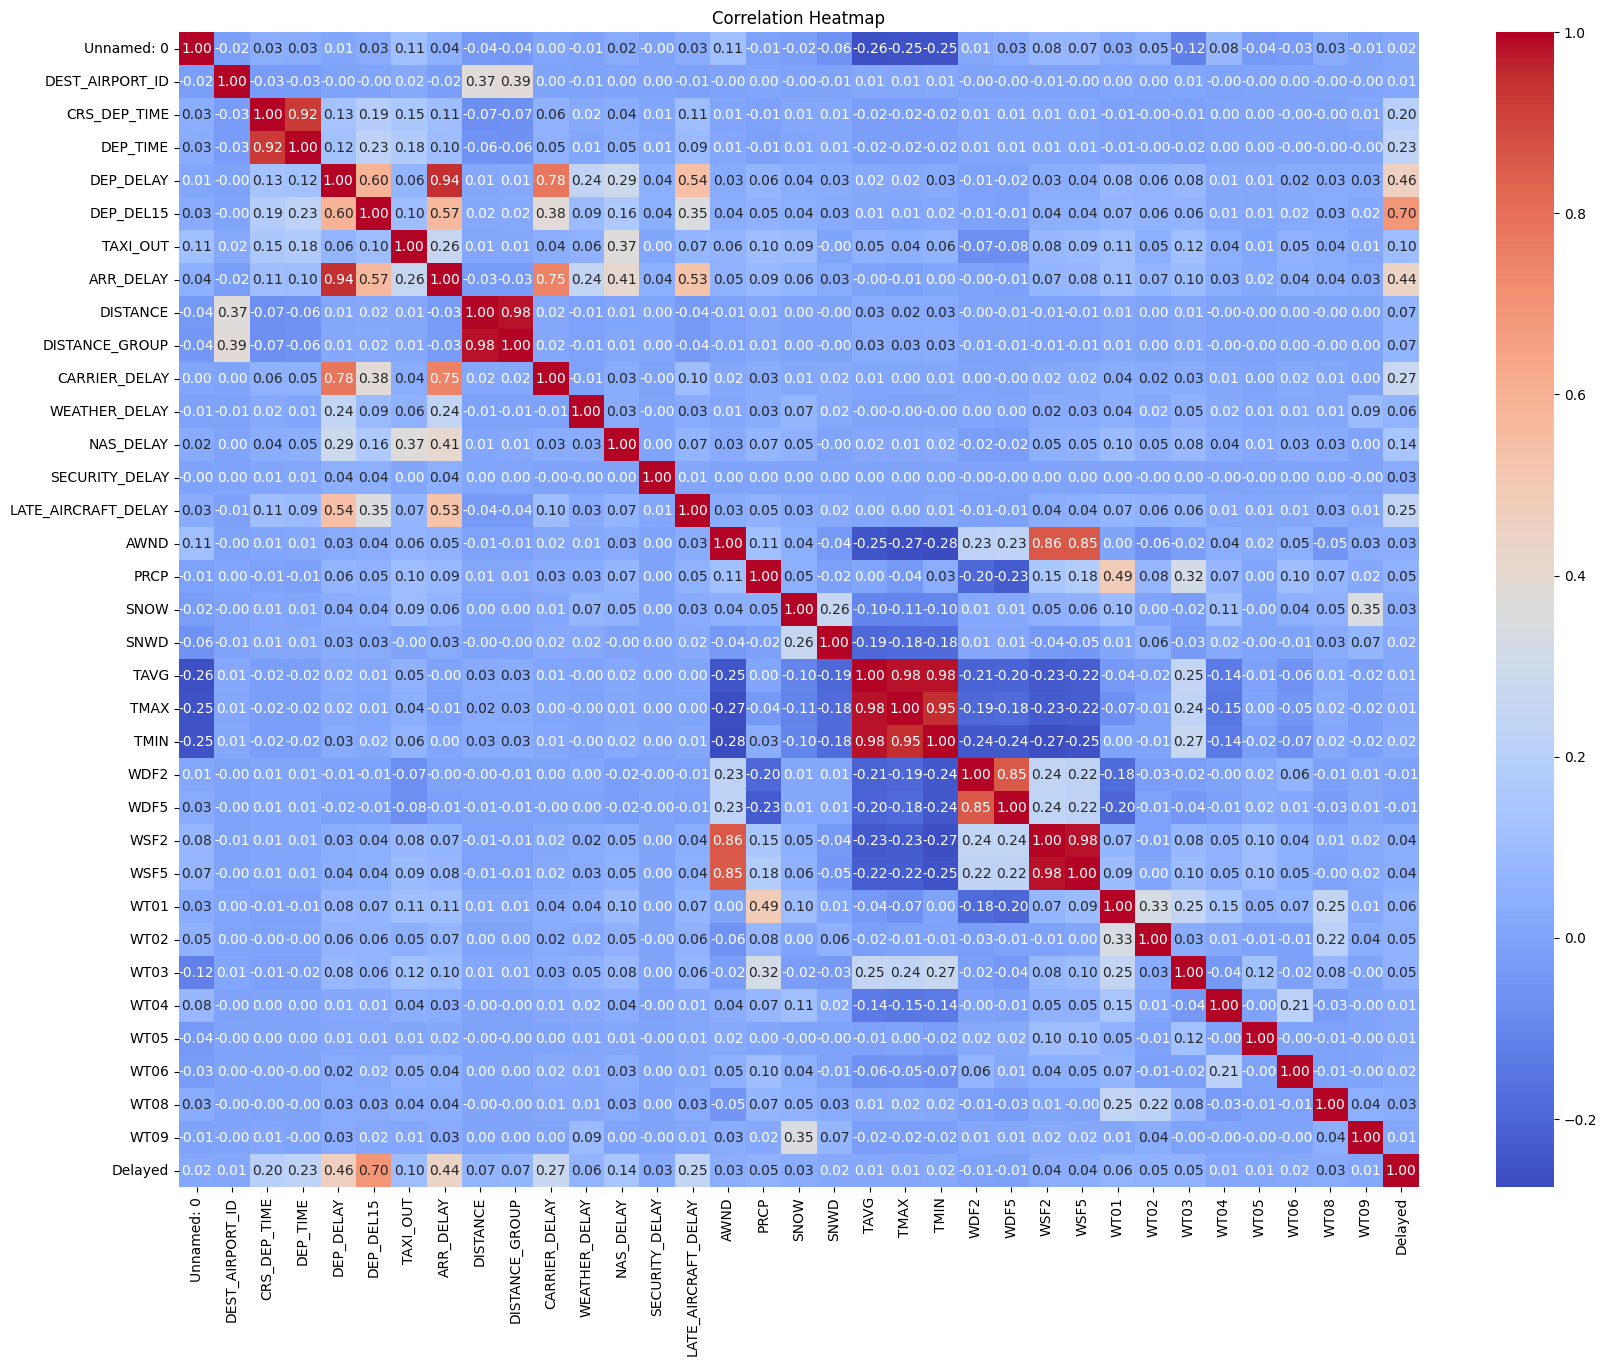

In [ ]:
#Plot correlation between different varibles in the dataset
corr_matrix=df_flight.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#Extract month, year, day and day_of_the_week from the FL_DATE column
df_flight['Month']=pd.to_datetime(df_flight['FL_DATE']).dt.month
df_flight['Year']=pd.to_datetime(df_flight['FL_DATE']).dt.year
df_flight['Day']=pd.to_datetime(df_flight['FL_DATE']).dt.day
df_flight['Day_of_the_week']=pd.to_datetime(df_flight['FL_DATE']).dt.weekday
df_flight.head()

,Unnamed: 0,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,DEST_AIRPORT_ID,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DEL15,TAXI_OUT,ARR_DELAY,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09,Delayed,Month,Year,Day,Day_of_the_week
0,0,2021-05-01,HA,N384HA,12173,HNL,1000,955.0,-5.0,0.0,20.0,1.0,4983,11,0.0,0.0,0.0,0.0,0.0,18.12,0.0,0.0,0.0,53,65,42,310,320,36.9,46.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5,2021,1,5
1,1,2021-05-01,DL,N869DN,13204,MCO,1552,1549.0,-3.0,0.0,13.0,-32.0,944,4,0.0,0.0,0.0,0.0,0.0,18.12,0.0,0.0,0.0,53,65,42,310,320,36.9,46.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5,2021,1,5
2,2,2021-05-01,DL,N377DA,13204,MCO,820,819.0,-1.0,0.0,20.0,-20.0,944,4,0.0,0.0,0.0,0.0,0.0,18.12,0.0,0.0,0.0,53,65,42,310,320,36.9,46.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5,2021,1,5
3,3,2021-05-01,DL,N140DU,13487,MSP,635,651.0,16.0,1.0,17.0,9.0,1029,5,0.0,0.0,0.0,0.0,0.0,18.12,0.0,0.0,0.0,53,65,42,310,320,36.9,46.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5,2021,1,5
4,4,2021-05-01,DL,N367NW,13303,MIA,1156,1153.0,-3.0,0.0,11.0,-34.0,1089,5,0.0,0.0,0.0,0.0,0.0,18.12,0.0,0.0,0.0,53,65,42,310,320,36.9,46.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5,2021,1,5


There are 2.83% missing values that we drop

In [ ]:
all_variables = df_flight.columns.tolist()
print(all_variables)

['Unnamed: 0', 'FL_DATE', 'OP_UNIQUE_CARRIER', 'TAIL_NUM', 'DEST_AIRPORT_ID', 'DEST', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'DEP_DEL15', 'TAXI_OUT', 'ARR_DELAY', 'DISTANCE', 'DISTANCE_GROUP', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'AWND', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2', 'WSF5', 'WT01', 'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT08', 'WT09', 'Delayed', 'Month', 'Year', 'Day', 'Day_of_the_week']


In [ ]:
df=df_flight.copy()
df['DEP_TIME'] = pd.to_datetime(df['DEP_TIME'], format='%H%M', errors='coerce')
df['Departure Hour'] = df['DEP_TIME'].dt.hour


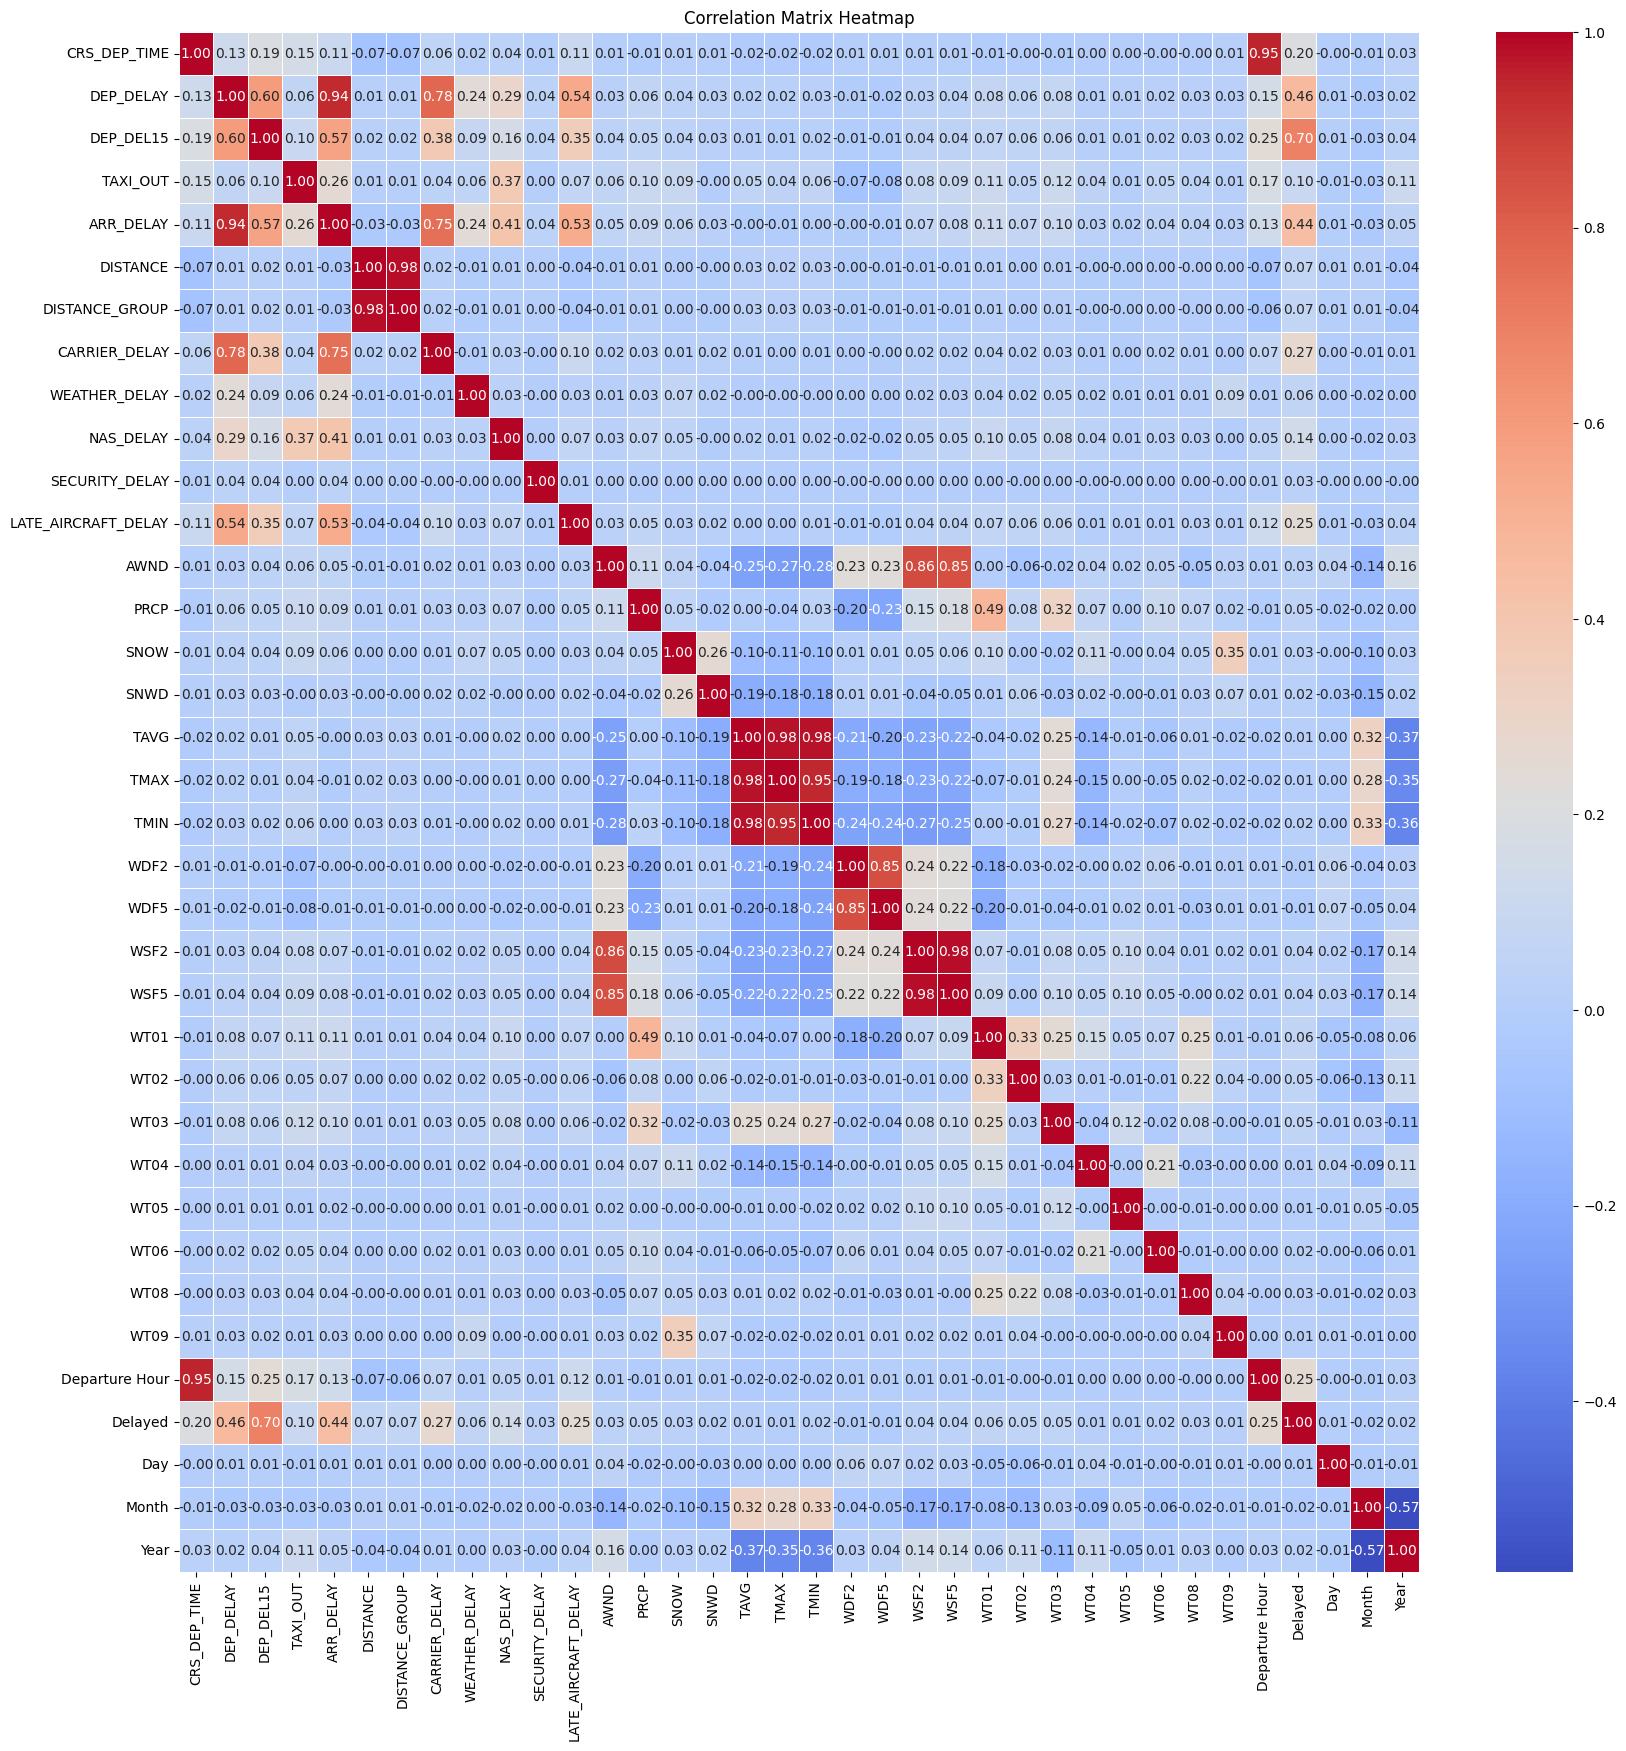

In [ ]:
columns = ['CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'DEP_DEL15', 'TAXI_OUT', 'ARR_DELAY', 'DISTANCE', 'DISTANCE_GROUP', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'AWND', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2', 'WSF5', 'WT01', 'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT08', 'WT09', 'Departure Hour', 'Delayed', 'Day','Month','Year']

subset_df_flight = df[columns]

correlation_matrix = subset_df_flight.corr()


plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

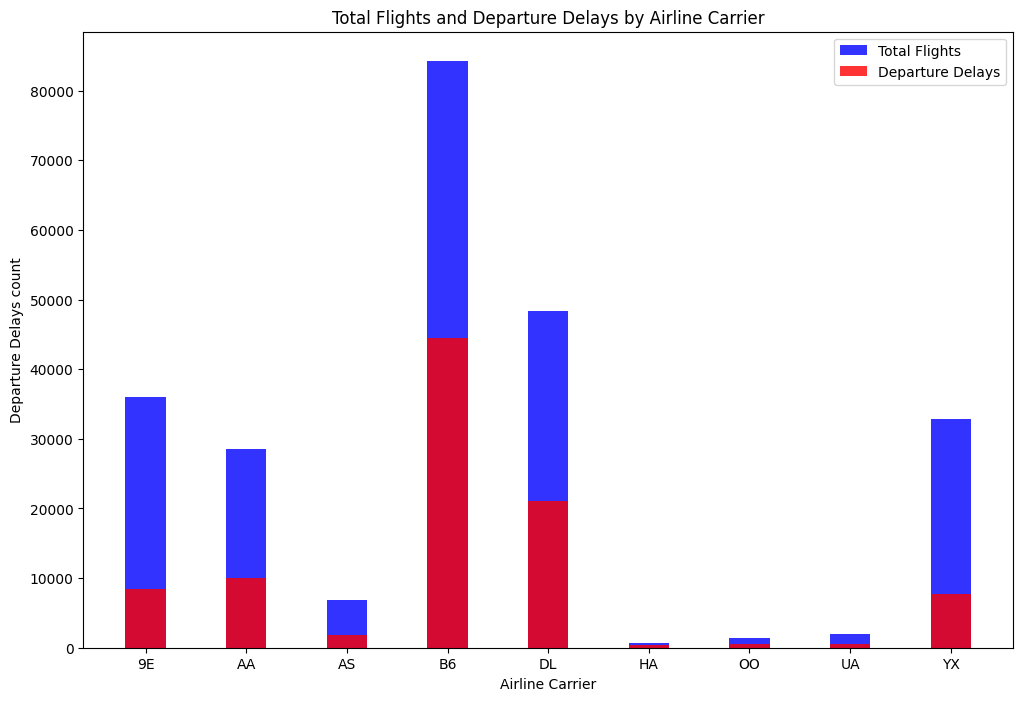

In [ ]:
total_flights = df_flight.groupby('OP_UNIQUE_CARRIER').size().reset_index(name='Total_Flights_from_JFK')

# Calculate the total number of departure delays for each airline carrier
total_departure_delays = df[df_flight['Delayed'] == 1].groupby('OP_UNIQUE_CARRIER').size().reset_index(name='Total_Departure_Delays_from_JFK')

# Merge the two DataFrames on 'OP_UNIQUE_CARRIER'
df_to_plot = pd.merge(total_departure_delays, total_flights, on='OP_UNIQUE_CARRIER', how='outer').fillna(0)

plt.figure(figsize=(12, 8))
bar_width = 0.4

# Bar for Total Flights
plt.bar(df_to_plot['OP_UNIQUE_CARRIER'], df_to_plot['Total_Flights_from_JFK'], width=bar_width, label='Total Flights', color='blue', alpha=0.8)

# Bar for Total Departure Delays
plt.bar(df_to_plot['OP_UNIQUE_CARRIER'], df_to_plot['Total_Departure_Delays_from_JFK'], width=bar_width, label='Departure Delays', color='red', alpha=0.8)

plt.title('Total Flights and Departure Delays by Airline Carrier')
plt.xlabel('Airline Carrier')
plt.ylabel('Departure Delays count')
plt.legend()
plt.show()

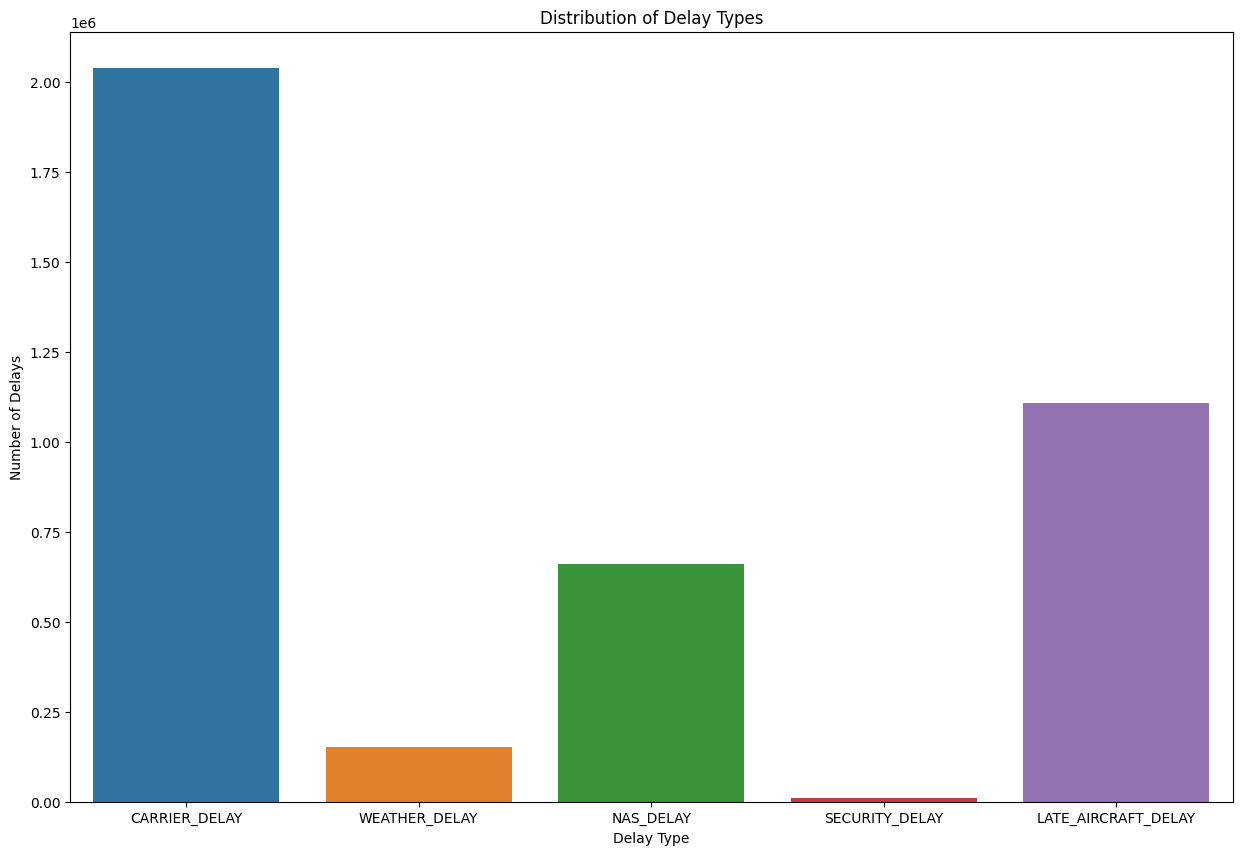

In [ ]:
delayed_flights = df_flight[df_flight['Delayed'] == 1]

# Calculate the total number of delays for each delay type
delay_counts = delayed_flights[['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY','LATE_AIRCRAFT_DELAY']].sum()

# Plot a stacked bar chart
plt.figure(figsize=(15, 10))
sns.barplot(x=delay_counts.index, y=delay_counts.values)
plt.title('Distribution of Delay Types')
plt.xlabel('Delay Type')
plt.ylabel('Number of Delays')
plt.show()

<Axes: xlabel='Departure Hour', ylabel='Density'>

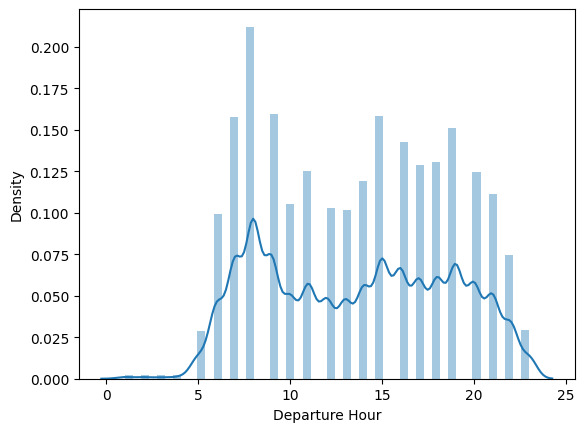

In [ ]:
sns.distplot(df['Departure Hour'])

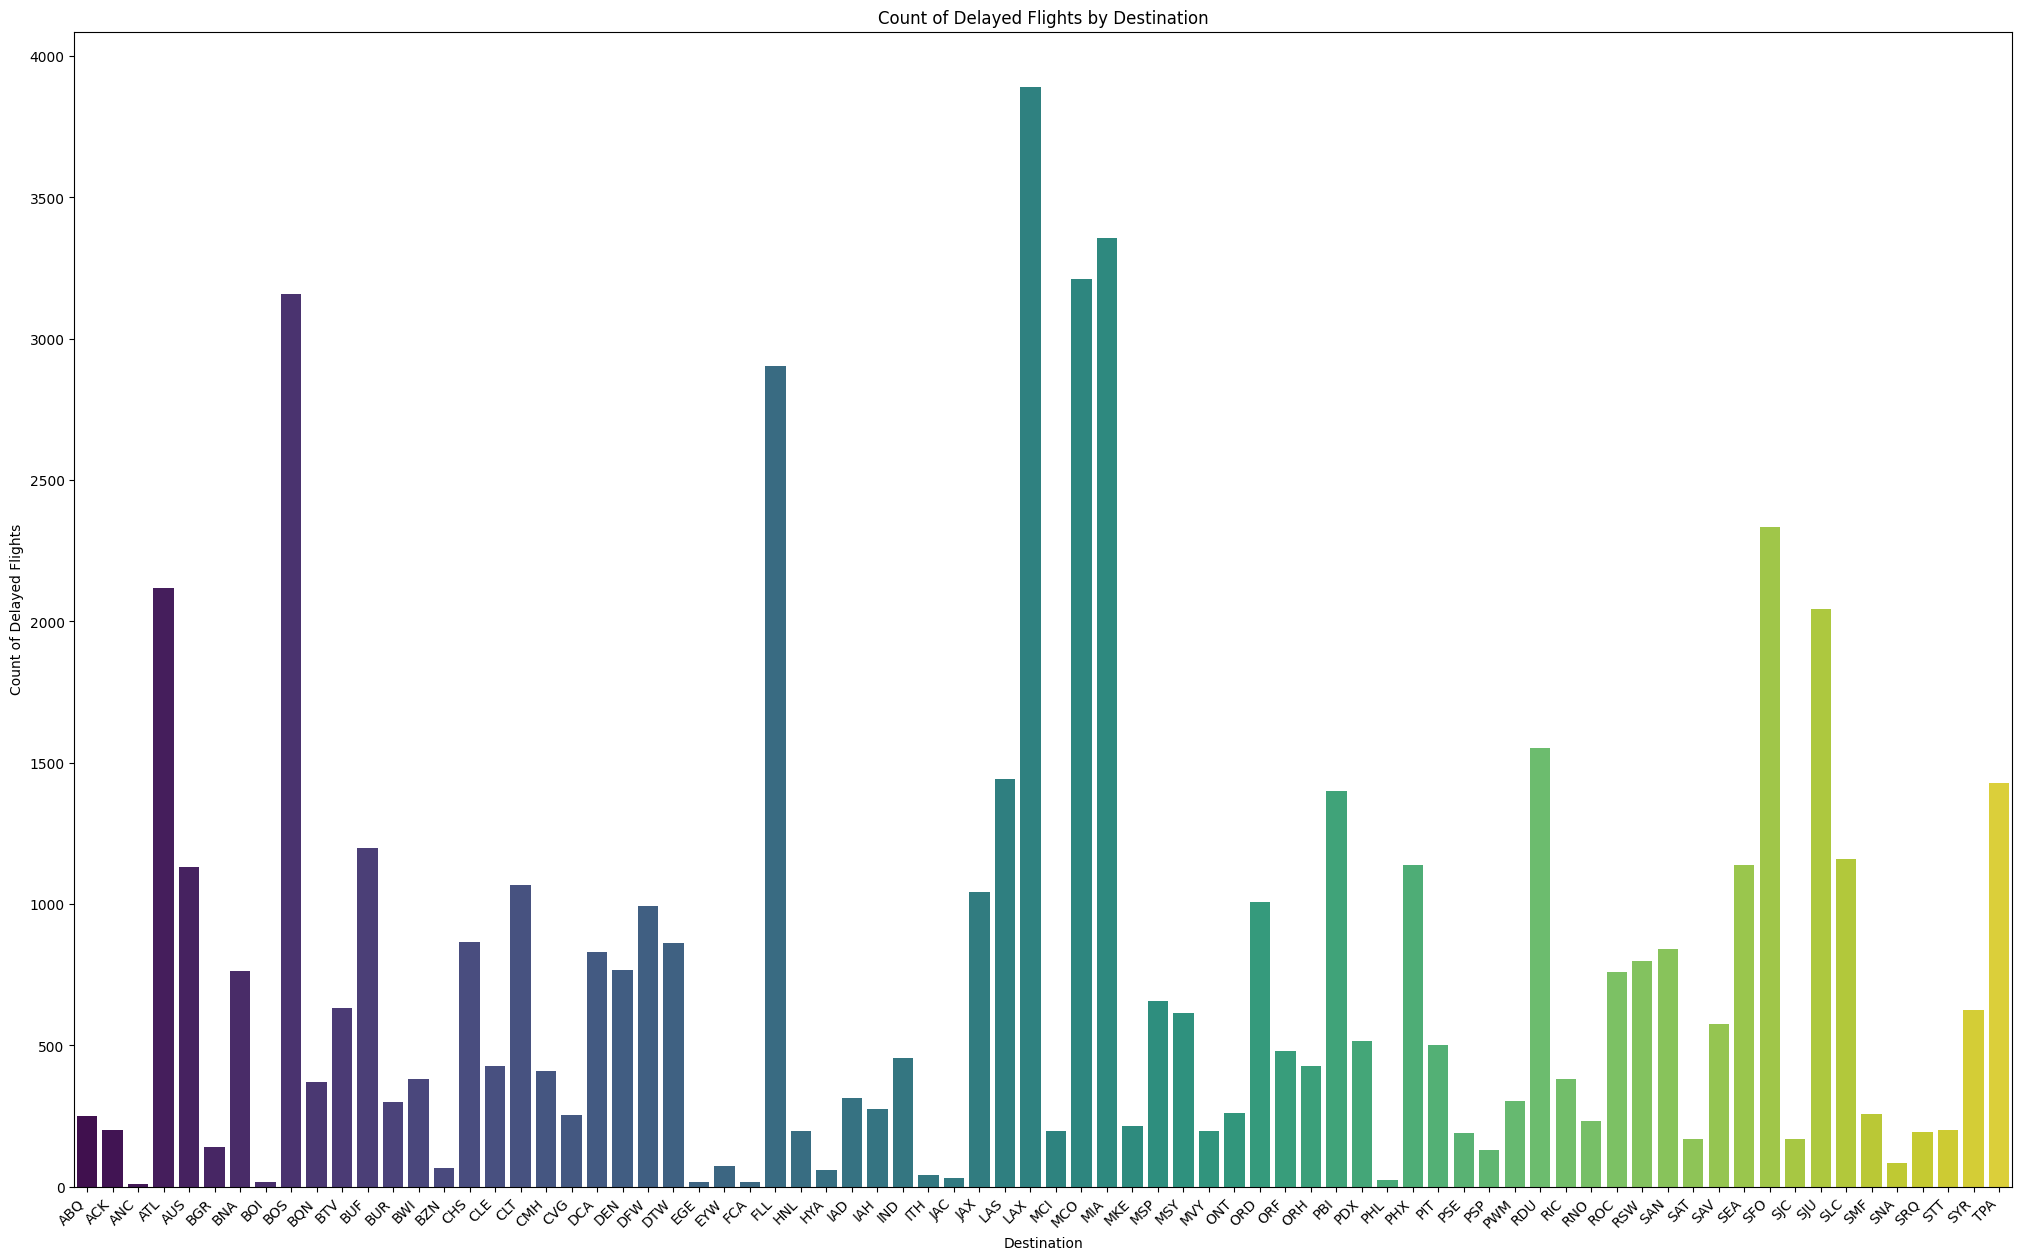

In [ ]:
dest_counts = df_flight.groupby('DEST')['DEP_DEL15'].agg(['count', 'sum']).reset_index()
dest_counts.columns = ['DEST', 'Total Flights', 'Delayed Flights']

# Filter for delayed flights (DEP_DEL15 == 1)
dest_counts = dest_counts[dest_counts['Delayed Flights'] > 0]

# Create a bar plo
plt.figure(figsize=(25, 15
                   ))
sns.barplot(x='DEST', y='Delayed Flights', data=dest_counts, palette='viridis')
plt.title('Count of Delayed Flights by Destination')
plt.xlabel('Destination')
plt.ylabel('Count of Delayed Flights')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

 ## **Predictive Analytics**

**Flight Delay Classification**


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler

import xgboost as xgb
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
#import lightgbm as lgb

### Model Development

In [ ]:
#Standardize numerical columns
numerical_columns=['DEP_TIME','TAXI_OUT','DISTANCE']
#numerical_columns=['DEP_TIME','TAXI_OUT','DISTANCE','PRCP','SNOW','SNWD','TAVG','TMAX','TMIN','WDF2','WDF5','WSF2','WSF5']
scaler = StandardScaler()
# Fit and transform the selected numerical columns
df_flight[numerical_columns] = scaler.fit_transform(df_flight[numerical_columns])

#Drop columns based on high correlation and redundancy
df_flight.drop(columns=['FL_DATE', 'DEP_DEL15','DEP_DELAY','ARR_DELAY','CRS_DEP_TIME','DEST','DISTANCE_GROUP','TAIL_NUM','CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY','WT09','AWND'], inplace=True)

#Label Encode Categorical Columns
label_encoder = LabelEncoder()
df_encoded=df_flight.copy()
# Iterate through columns and perform label encoding
for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object' or column=='Year' or column=='DEST_AIRPORT_ID':  # Check if the column contains categorical data
        df_encoded[column + '_encoded'] = label_encoder.fit_transform(df_encoded[column])
        df_encoded.drop(columns=[column], inplace=True)

In [ ]:
df_flight.head()

,Unnamed: 0,OP_UNIQUE_CARRIER,DEST_AIRPORT_ID,DEP_TIME,TAXI_OUT,DISTANCE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,Delayed,Month,Year,Day,Day_of_the_week
0,0,HA,12173,-0.848593,-0.386762,4.443440,0.0,0.0,0.0,53,65,42,310,320,36.9,46.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5,2021,1,5
1,1,DL,13204,0.322697,-0.938835,-0.278754,0.0,0.0,0.0,53,65,42,310,320,36.9,46.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5,2021,1,5
2,2,DL,13204,-1.116767,-0.386762,-0.278754,0.0,0.0,0.0,53,65,42,310,320,36.9,46.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5,2021,1,5
3,3,DL,13487,-1.448040,-0.623365,-0.179376,0.0,0.0,0.0,53,65,42,310,320,36.9,46.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5,2021,1,5
4,4,DL,13303,-0.458163,-1.096570,-0.109227,0.0,0.0,0.0,53,65,42,310,320,36.9,46.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5,2021,1,5


In [ ]:
df_encoded.isna().sum()

Unnamed: 0                   0
DEP_TIME                     0
TAXI_OUT                     0
DISTANCE                     0
PRCP                         0
SNOW                         0
SNWD                         0
TAVG                         0
TMAX                         0
TMIN                         0
WDF2                         0
WDF5                         0
WSF2                         0
WSF5                         0
WT01                         0
WT02                         0
WT03                         0
WT04                         0
WT05                         0
WT06                         0
WT08                         0
Delayed                      0
Month                        0
Day                          0
Day_of_the_week              0
OP_UNIQUE_CARRIER_encoded    0
DEST_AIRPORT_ID_encoded      0
Year_encoded                 0
dtype: int64

In [ ]:
df_encoded.dropna(inplace=True)

For model:  HistGradientBoostingClassifier()
0.7594398340248962
              precision    recall  f1-score   support

           0       0.77      0.86      0.81     29101
           1       0.74      0.60      0.66     19099

    accuracy                           0.76     48200
   macro avg       0.76      0.73      0.74     48200
weighted avg       0.76      0.76      0.75     48200

Mean validation Accuracy: 0.7588


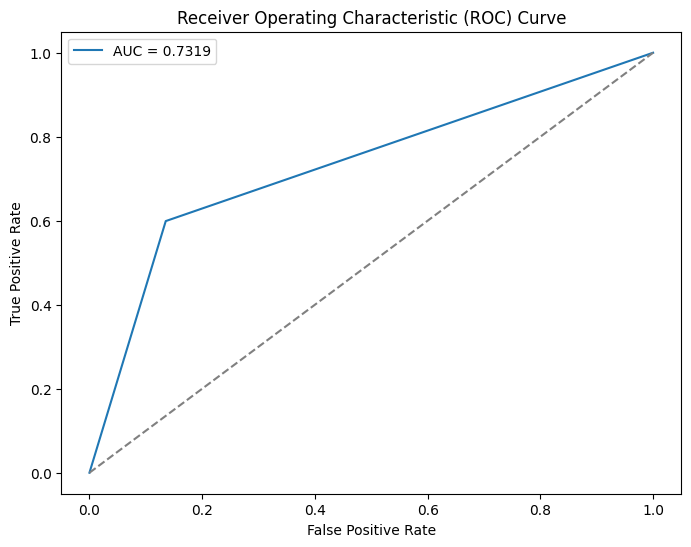

--------------------------------------------------------------------------------------------------------------------------------------------------------
For model:  LogisticRegression()
0.6037551867219917
              precision    recall  f1-score   support

           0       0.60      1.00      0.75     29101
           1       0.00      0.00      0.00     19099

    accuracy                           0.60     48200
   macro avg       0.30      0.50      0.38     48200
weighted avg       0.36      0.60      0.45     48200

Mean validation Accuracy: 0.6054


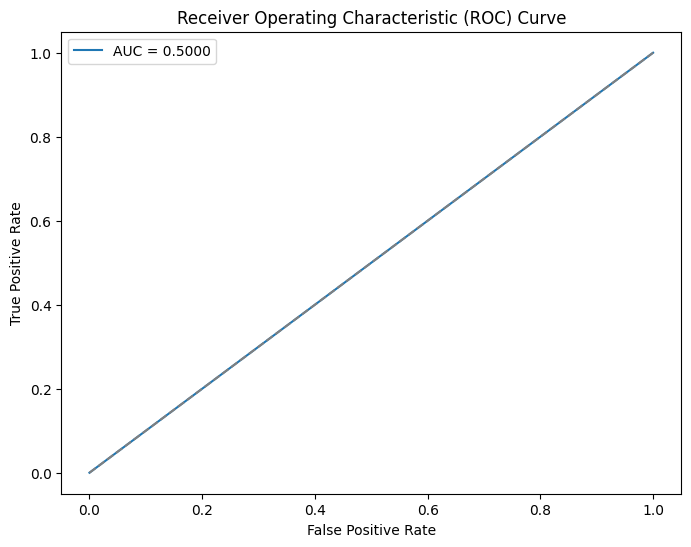

--------------------------------------------------------------------------------------------------------------------------------------------------------
For model:  DecisionTreeClassifier()
0.8283195020746889
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     29101
           1       0.79      0.78      0.78     19099

    accuracy                           0.83     48200
   macro avg       0.82      0.82      0.82     48200
weighted avg       0.83      0.83      0.83     48200

Mean validation Accuracy: 0.8265


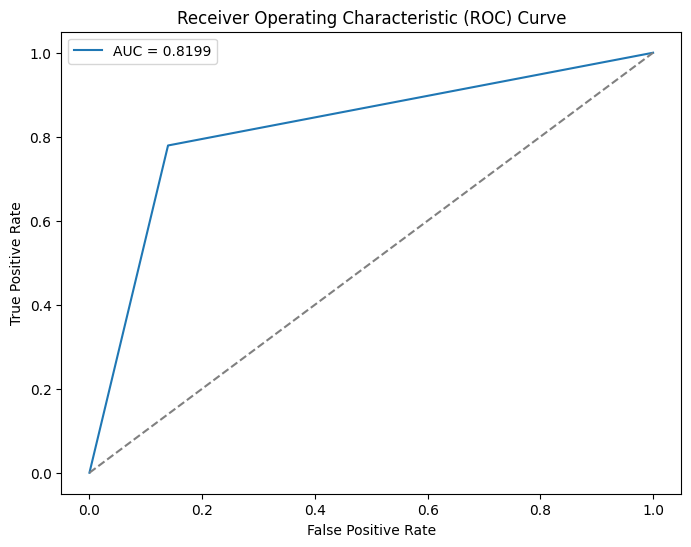

--------------------------------------------------------------------------------------------------------------------------------------------------------
For model:  RandomForestClassifier(max_depth=2)
0.6079668049792532
              precision    recall  f1-score   support

           0       0.61      1.00      0.75     29101
           1       0.85      0.01      0.03     19099

    accuracy                           0.61     48200
   macro avg       0.73      0.51      0.39     48200
weighted avg       0.70      0.61      0.47     48200

Mean validation Accuracy: 0.6118


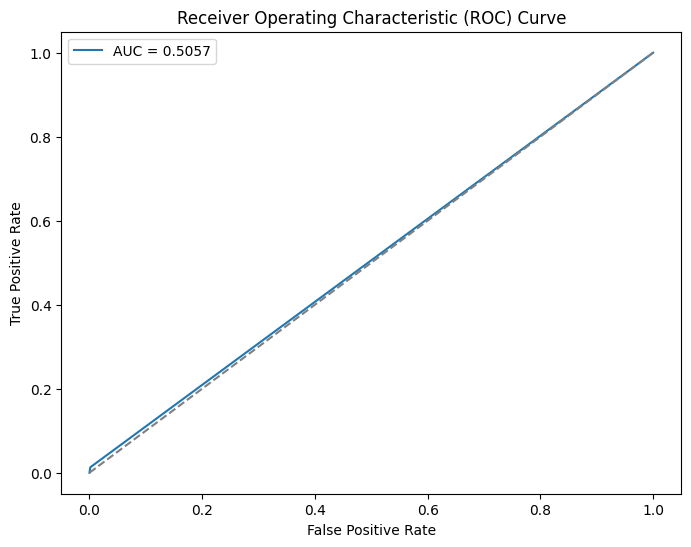

--------------------------------------------------------------------------------------------------------------------------------------------------------
For model:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
0.8388589211618257
              precision    recall  f1-score   support

      

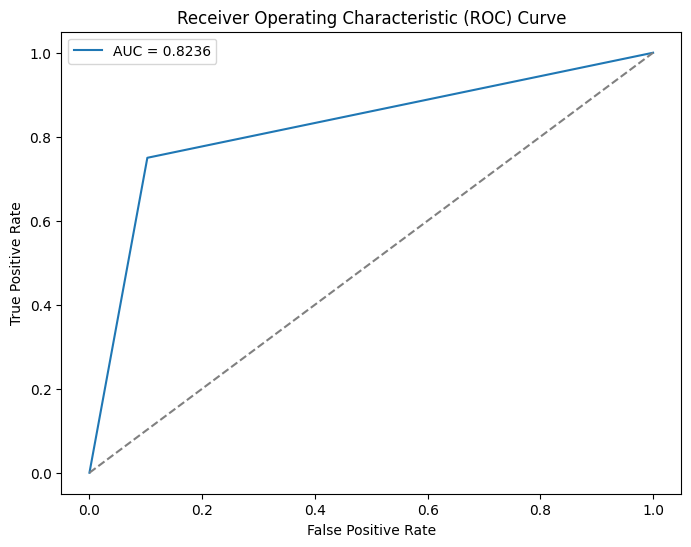

--------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
df_flight_processed=df_encoded.copy()

y = df_flight_processed['Delayed']
X = df_flight_processed.drop(columns=['Delayed'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Gradient Classifier': HistGradientBoostingClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=2),
    'XG Boost': xgb.XGBClassifier(n_estimators=1000, learning_rate=0.3, random_state=42),
    #'Naive Baies': GaussianNB(),
    #'SVM': svm.SVC(kernel='linear', C=1.0, random_state=42)
    #'LightGBM' :lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Train and evaluate each model
results = {}
all_models=[]
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('For model: ', model)
    print(accuracy)
    print(classification_report(y_test, y_pred))
    results[name] = accuracy

    all_models.append(model)
    # if name=='XG Boost':
    #     xg_model=model


     # Initialize k-fold cross-validation
    k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

    # Perform k-fold cross-validation and get accuracy scores
    accuracy_scores = cross_val_score(model, X, y, cv=k_fold, scoring='accuracy')

    # Calculate and print the mean accuracy across all folds
    mean_accuracy = accuracy_scores.mean()
    print(f"Mean validation Accuracy: {mean_accuracy:.4f}")

    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    print('--------------------------------------------------------------------------------------------------------------------------------------------------------')

XG Boost performs the best and is the selected model. We have also plotted the variable importance for each model whoich represents how the model is making predictions.



#Feature Importances of all experimented models#

Feature importance method does not exist for this model: HistGradientBoostingClassifier()
Feature importance method does not exist for this model: LogisticRegression()


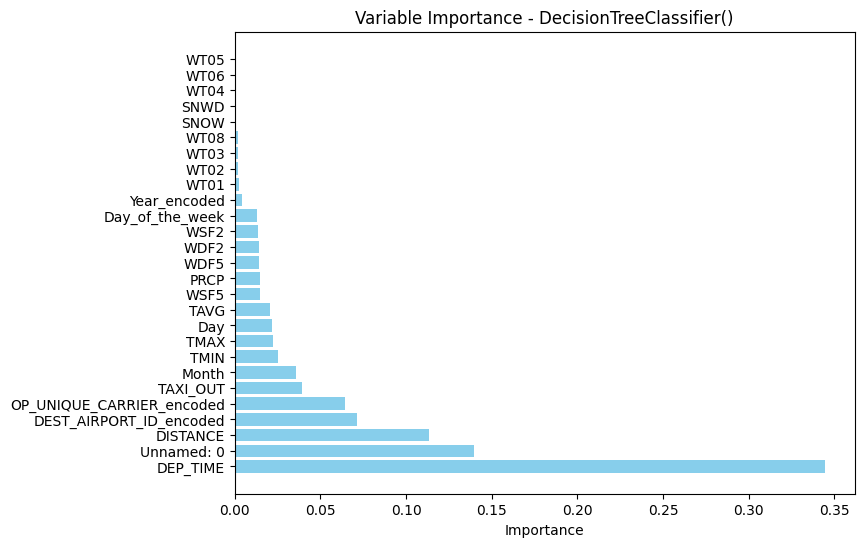

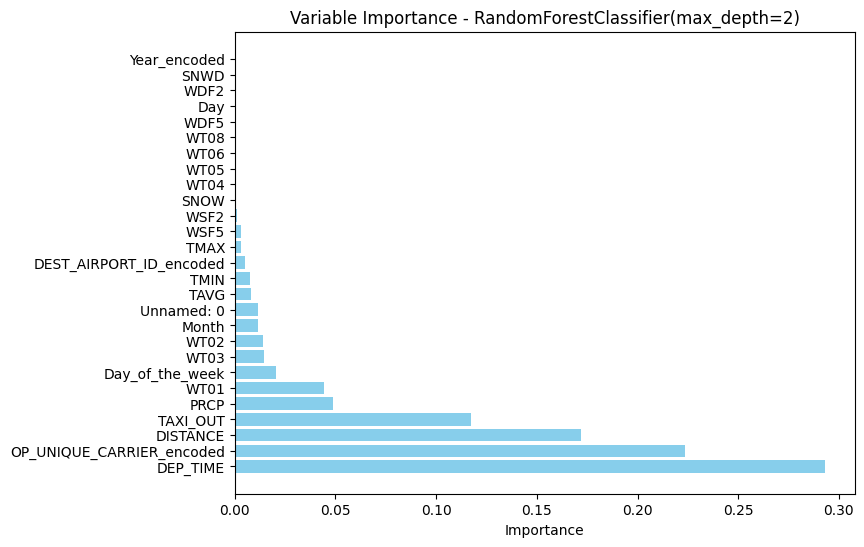

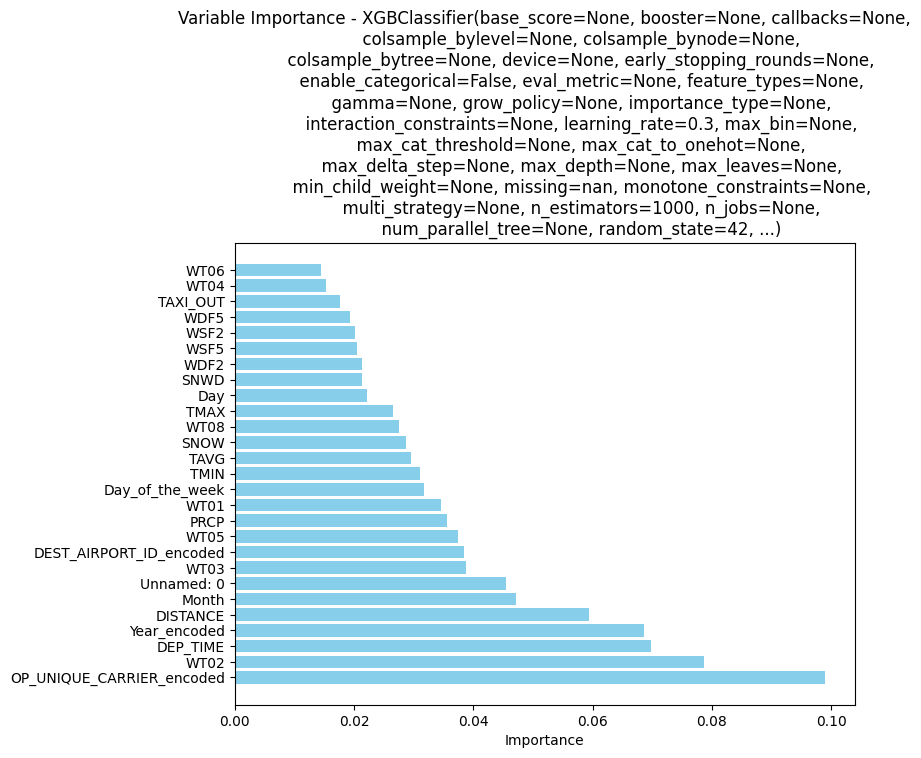

In [ ]:
for model in all_models:
    try:
        importances = model.feature_importances_
        feature_importances = pd.DataFrame(importances, index=X.columns, columns=['Importance'])
        feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
        # Plotting feature importances
        plt.figure(figsize=(8, 6))
        plt.barh(feature_importances.index, feature_importances['Importance'], color='skyblue')
        plt.xlabel('Importance')
        plt.title(f'Variable Importance - {model}')
        plt.show()
    except:
        print(f'Feature importance method does not exist for this model: {model}')

In [ ]:
xg_model = all_models[4]
xg_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

##Hyperparameter Tuning using GridSearchCV##


In [ ]:
#Find the best parameters for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
'n_estimators': [100, 200, 300, 500, 1000, 1200, 1500],
'learning_rate': [0.01, 0.1, 0.2, 0.3],
'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(estimator=xg_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score:.4f}")

# Get the best model
best_xgb = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_xgb.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy of Best Model: {test_accuracy:.4f}")

#Model Explainability using SHaP(SHapley Additive exPlanations) values#

In [ ]:
import shap

# Create an explainer using the SHAP library
explainer = shap.Explainer(xg_model)
shap_values = explainer(X_train)

# Create a summary plot
shap.plots.beeswarm(shap_values, max_display=20)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))  # Input layer + Hidden layer
model.add(Dense(3, activation='softmax'))  # Output layer (3 classes for Iris dataset)

# # Compile the model
#model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Train the model
#model.fit(X_train, y_train, epochs=50, batch_size=5, verbose=1)

# # Evaluate the model on test data
#loss, accuracy = model.evaluate(X_test, y_test)

#Svm_model = svm.SVC(kernel='rbf', C=1.0, random_state=42)

# # Train the SVM model
#Ssvm_model.fit(X_train, y_train)

###**Linear Regression -predicting delay duration in minutes**

In [ ]:
df = pd.read_csv('FINAL_DATA_jfk_weather_airplane_data.csv')


In [ ]:
correlation_matrix = df.corr()
correlation_matrix

In [ ]:
# Highlight variables with high corr
def highlight_corr(x):
    color = 'yellow' if 0.7 <= x < 1 else ''
    return f'background-color: {color}'

styled_correlation = correlation_matrix.style.applymap(highlight_corr)
styled_correlation

Drop variables (including less relevant independent variables, highly correlated independent variables (>=0.7), and other delay variables that could not be known before departure)

In [ ]:
variables_to_drop = ['FL_DATE', 'TAIL_NUM', 'DEST_AIRPORT_ID',
                     'DEST', 'DEP_TIME', 'DEP_DEL15', 'ARR_DELAY',
                     'DISTANCE_GROUP', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY',
                     'LATE_AIRCRAFT_DELAY', 'TMAX', 'TMIN', 'WDF5', 'WSF2', 'WSF5', 'WT09']

df = df.drop(columns=variables_to_drop, axis=1)
df.head()

In [ ]:
#Standardize numerical columns
from sklearn.preprocessing import StandardScaler
numerical_columns=['TAXI_OUT','DISTANCE','AWND','PRCP','SNOW','SNWD','TAVG','WDF2','WT01','WT02','WT03',
                   'WT04','WT05','WT06','WT08']
scaler = StandardScaler()
# Fit and transform the selected numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df.head()

Classify CRS_DEP_TIME into morning, afternoon, evening, and night

In [ ]:
def time_classification(df):
    # Initialize new columns with zeros
    df['CRS_DEP_TIME_MORNING'] = 0
    df['CRS_DEP_TIME_AFTERNOON'] = 0
    df['CRS_DEP_TIME_EVENING'] = 0
    df['CRS_DEP_TIME_NIGHT'] = 0

    # Classify times
    df['CRS_DEP_TIME_MORNING'] = ((df['CRS_DEP_TIME'] > 500) & (df['CRS_DEP_TIME'] <= 1200)).astype(int)
    df['CRS_DEP_TIME_AFTERNOON'] = ((df['CRS_DEP_TIME'] > 1200) & (df['CRS_DEP_TIME'] <= 1700)).astype(int)
    df['CRS_DEP_TIME_EVENING'] = ((df['CRS_DEP_TIME'] > 1700) & (df['CRS_DEP_TIME'] <= 2100)).astype(int)
    df['CRS_DEP_TIME_NIGHT'] = ((df['CRS_DEP_TIME'] > 2100) & (df['CRS_DEP_TIME'] <= 2400) | (df['CRS_DEP_TIME'] >= 0) & (df['CRS_DEP_TIME'] <= 500)).astype(int)

    return df

In [ ]:
df_time_classifier = time_classification(df)
df_time_classifier.head()

Create dummys for OP_UNIQUE_CARRIER
9 airline carriers in total: ['HA', 'DL', '9E', 'YX', 'AA', 'AS', 'UA', 'B6', 'OO']

In [ ]:
df_time_classifier['OP_UNIQUE_CARRIER'].unique()

In [ ]:
airline_dummies = pd.get_dummies(df_time_classifier['OP_UNIQUE_CARRIER'])
airline_dummies

In [ ]:
df_with_airline_dummies = pd.concat([df_time_classifier, airline_dummies], axis=1)
df_with_airline_dummies

In [ ]:
cat_variables_to_drop = ['OP_UNIQUE_CARRIER', 'CRS_DEP_TIME', 'CRS_DEP_TIME_MORNING', '9E']
# drop 'CRS_DEP_TIME_MORNING' and '9E' to avoid dummy variable trap

df_for_lr = df_with_airline_dummies.drop(columns=cat_variables_to_drop, axis=1)
df_for_lr.head()

In [ ]:
len(df_for_lr)

In [ ]:
# Drop rows with missing values
df_for_lr = df_for_lr.dropna()

# Drop rows with DEP_DELAY > 300 mins
df_for_lr = df_for_lr[df_for_lr['DEP_DELAY'] <= 300]

In [ ]:
len(df_for_lr)

In [ ]:
len(df_for_lr) / 248039

In [ ]:
#training: 75% Testing: 25%
# Split training and testing data
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_for_lr, test_size=0.25, random_state=1001)


x_train = train.iloc[:, 1:28]
y_train = train.iloc[:, 0]

x_test = test.iloc[:, 1:28]
y_test = test.iloc[:, 0]

In [ ]:
# fit the LR model
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train,y_train)

In [ ]:
import statsmodels.api as sm

# Adding a constant to the model (intercept)
x_train_sm = sm.add_constant(x_train)

# Fit the regression model
sm_model = sm.OLS(y_train, x_train_sm).fit()

# Print the summary
print(sm_model.summary())

In [ ]:
#Get predictions for delay duration (time in mins) using testing data
testing_predictions  = model.predict(x_test)
testing_predictions

In [ ]:
# SVM model
from sklearn.svm import SVR

svm_model = SVR(kernel='rbf')  # You can choose different kernels such as 'linear', 'poly', 'rbf'
svm_model.fit(x_train,y_train)

In [ ]:
testing_predictions_SVR  = svm_model.predict(x_test)
testing_predictions_SVR

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
# Mean Absolute Error
mae_SVR = mean_absolute_error(y_test, testing_predictions_SVR)

# Mean Squared Error
mse_SVR = mean_squared_error(y_test, testing_predictions_SVR)

# Root Mean Squared Error
rmse_SVR = np.sqrt(mse_SVR)

# Print the results
print("Mean Absolute Error:", mae_SVR)
print("Mean Squared Error:", mse_SVR)
print("Root Mean Squared Error:", rmse_SVR)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Mean Absolute Error
mae = mean_absolute_error(y_test, testing_predictions)

# Mean Squared Error
mse = mean_squared_error(y_test, testing_predictions)

# Root Mean Squared Error
rmse = np.sqrt(mse)

# Print the results
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

In [ ]:
# linear model
test['Prediction_linear'] = testing_predictions
test['Prediction_SVM'] = testing_predictions_SVR
test["Diff_linear"] = test['Prediction_linear'] - test['DEP_DELAY']
test["Diff_SVM"] = test['Prediction_SVM'] - test['DEP_DELAY']
test[['DEP_DELAY', 'Prediction_linear', 'Diff_linear', 'DEP_DELAY', 'Prediction_SVM', 'Diff_SVM']].head(20)

In [ ]:
test["Prediction_SVM"].describe()

In [ ]:
test["Diff_SVM"].describe()

In [ ]:
test["Diff_SVM"].sum()

In [ ]:
test["Prediction_linear"].describe()

In [ ]:
test["Diff_linear"].describe()

In [ ]:
test["Diff_linear"].sum()

In [ ]:
test["Diff_linear"].idxmin()
test.loc[test["Diff_linear"].idxmin()]

In [ ]:
df.loc[244031]

In [ ]:
len(df[df['DEP_DELAY'] > 300])

In [ ]:
len(test[test['DEP_DELAY'] > 300])

In [ ]:
import matplotlib.pyplot as plt

plt.hist(test["Prediction_linear"], bins=30, edgecolor='black')
plt.title('Linear Model - Distribution of Predicted Delay Time')
plt.xlabel('Predicted Delay Time in Mins')
plt.ylabel('Frequency')
plt.xticks(ticks=range(-20, 100, 10), rotation=45)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.hist(test["Prediction_SVM"], bins=30, edgecolor='black')
plt.title('SVM Model - Distribution of Predicted Delay Time')
plt.xlabel('Predicted Delay Time in Mins')
plt.ylabel('Frequency')
plt.xticks(ticks=range(-20, 100, 10), rotation=45)
plt.show()

In [ ]:
plt.hist(test["Diff_linear"], bins=50, edgecolor='black')
plt.title('Linear Model - Distribution of Diffs between Predicted and Actual Delay Time')
plt.xlabel('Delay Time Diffs in Mins')
plt.ylabel('Frequency')
plt.xticks(ticks=range(-300, 101, 20), rotation=45)
plt.show()

In [ ]:
plt.hist(test["Diff_SVM"], bins=50, edgecolor='black')
plt.title('SVM Model - Distribution of Diffs between Predicted and Actual Delay Time')
plt.xlabel('Delay Time Diffs in Mins')
plt.ylabel('Frequency')
plt.xticks(ticks=range(-300, 101, 20), rotation=45)
plt.show()